In [1]:
#Read in Libraries necessary for cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob

In [2]:
#Read in the dataset
Flippers = pd.read_csv('flipped_titles.csv')

In [3]:
#Explore the dataset
Flippers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51197 entries, 0 to 51196
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EAN                   51197 non-null  int64  
 1   Title                 51197 non-null  object 
 2   Ingram Category Code  51103 non-null  object 
 3   MJR BISAC             51188 non-null  object 
 4   BISAC                 51188 non-null  object 
 5   Annotation Text       51197 non-null  object 
 6   Category              51197 non-null  int64  
 7   language_detected     51197 non-null  object 
 8   Category_Relabeled_1  51197 non-null  int64  
 9   Category_Relabeled_2  51197 non-null  int64  
 10  Category_Relabeled_3  46538 non-null  float64
 11  Change_1              51197 non-null  bool   
 12  Change_2              51197 non-null  bool   
 13  Change_3              46538 non-null  object 
dtypes: bool(2), float64(1), int64(4), object(7)
memory usage: 4.8+ MB


In [4]:
#Set the Datatypes
Flippers[['EAN', 'Category', 'Category_Relabeled_1', 'Category_Relabeled_2', 'Category_Relabeled_3', 'Change_1', 'Change_2', 'Change_3']] = Flippers[['EAN', 'Category', 'Category_Relabeled_1', 'Category_Relabeled_2', 'Category_Relabeled_3', 'Change_1', 'Change_2', 'Change_3']].astype('str')

In [5]:
#Review the Dataset
Flippers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51197 entries, 0 to 51196
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EAN                   51197 non-null  object
 1   Title                 51197 non-null  object
 2   Ingram Category Code  51103 non-null  object
 3   MJR BISAC             51188 non-null  object
 4   BISAC                 51188 non-null  object
 5   Annotation Text       51197 non-null  object
 6   Category              51197 non-null  object
 7   language_detected     51197 non-null  object
 8   Category_Relabeled_1  51197 non-null  object
 9   Category_Relabeled_2  51197 non-null  object
 10  Category_Relabeled_3  51197 non-null  object
 11  Change_1              51197 non-null  object
 12  Change_2              51197 non-null  object
 13  Change_3              51197 non-null  object
dtypes: object(14)
memory usage: 5.5+ MB


In [6]:
#Get Sentiment and Polarity Metrics from TextBlob
Flippers['Polarity'] = Flippers['Annotation Text'].apply(lambda text: TextBlob(text).sentiment.polarity)
Flippers['Sentiment'] = Flippers['Polarity'].apply(lambda polarity: 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral')

In [7]:
#Review the Dataset
Flippers.head()

,EAN,Title,Ingram Category Code,MJR BISAC,BISAC,Annotation Text,Category,language_detected,Category_Relabeled_1,Category_Relabeled_2,Category_Relabeled_3,Change_1,Change_2,Change_3,Polarity,Sentiment
0,9780063805910,Sea Creatures: Amazing Coloring Book for Kids ...,CL,JNF,JNF001010,"For anyone who loves sea creatures, this color...",0,en,0,0,1.0,True,True,False,0.357031,positive
1,9780107432195,Fairy tale fantasy coloring books for adults: ...,AT,ART,ART051000,The sketches in this Fairy tale fantasy colori...,0,en,0,0,1.0,True,True,False,0.426667,positive
2,9780228204817,Animals Big and Small: Baby Coloring Book,CL,JUV,JUV054000,"Babies find coloring challenging, especially s...",1,en,1,0,0.0,True,False,True,0.132143,positive
3,9780228204831,At the Zoo: Baby Coloring Pages,CL,JUV,JUV054000,What are the animals living in the zoo? These ...,1,en,1,0,0.0,True,False,True,0.191667,positive
4,9780228204893,Carting Craze!: Boys Coloring Book Ages 8-10,CL,JUV,JUV054000,Carting is an adrenaline rushing activity that...,1,en,1,0,1.0,True,False,False,0.078977,positive


In [31]:
import plotly.graph_objects as go
import statistics

# Calculate the mean polarity score
mean_polarity = statistics.mean(Flippers['Polarity'])

# Create a Plotly histogram
fig = go.Figure(data=[go.Histogram(x=Flippers['Polarity'], nbinsx=30)])
fig.update_layout(title=f'Histogram of Polarity Scores - {name}',
                  xaxis_title='Polarity',
                  yaxis_title='Frequency')

# Add mean as a text annotation
fig.add_annotation(x=mean_polarity, y=0.9, text=f"Mean: {mean_polarity:.2f}",
                   showarrow=False, font=dict(color='black'))

fig.show()

In [24]:
#Get Round Changes
Round_1_Changes = Flippers[Flippers['Change_1'] == 'False']
Round_2_Changes = Flippers[Flippers['Change_2'] == 'False']
Round_3_Changes = Flippers[Flippers['Change_3'] == 'False']

In [25]:
Round_1_Changes.info()
Round_2_Changes.info()
Round_3_Changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26455 entries, 117 to 51195
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EAN                   26455 non-null  object 
 1   Title                 26455 non-null  object 
 2   Ingram Category Code  26400 non-null  object 
 3   MJR BISAC             26455 non-null  object 
 4   BISAC                 26455 non-null  object 
 5   Annotation Text       26455 non-null  object 
 6   Category              26455 non-null  object 
 7   language_detected     26455 non-null  object 
 8   Category_Relabeled_1  26455 non-null  object 
 9   Category_Relabeled_2  26455 non-null  object 
 10  Category_Relabeled_3  26455 non-null  object 
 11  Change_1              26455 non-null  object 
 12  Change_2              26455 non-null  object 
 13  Change_3              26455 non-null  object 
 14  Polarity              26455 non-null  float64
 15  Sentiment        

In [12]:
#Get Datasets
Unflagged_First_Round = Flippers[(Flippers['Change_1'] == 'False') & (Flippers['Category_Relabeled_1'] == '0')]
Flagged_First_Round = Flippers[(Flippers['Change_1'] == 'False') & (Flippers['Category_Relabeled_1'] == '1')]
Unflagged_Second_Round = Flippers[(Flippers['Change_2'] == 'False') & (Flippers['Category_Relabeled_2'] == '0')]
Flagged_Second_Round = Flippers[(Flippers['Change_2'] == 'False') & (Flippers['Category_Relabeled_2'] == '1')]
Unflagged_Third_Round = Flippers[(Flippers['Change_3'] == 'False') & (Flippers['Category_Relabeled_3'] == '0.0')]
Flagged_Third_Round = Flippers[(Flippers['Change_3'] == 'False') & (Flippers['Category_Relabeled_3'] == '1.0')]

In [27]:
Unflagged_First_Round.info()
Flagged_First_Round.info()
Unflagged_Second_Round.info()
Flagged_Second_Round.info()
Unflagged_Third_Round.info()
Flagged_Third_Round.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5998 entries, 117 to 51195
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EAN                   5998 non-null   object 
 1   Title                 5998 non-null   object 
 2   Ingram Category Code  5998 non-null   object 
 3   MJR BISAC             5998 non-null   object 
 4   BISAC                 5998 non-null   object 
 5   Annotation Text       5998 non-null   object 
 6   Category              5998 non-null   object 
 7   language_detected     5998 non-null   object 
 8   Category_Relabeled_1  5998 non-null   object 
 9   Category_Relabeled_2  5998 non-null   object 
 10  Category_Relabeled_3  5998 non-null   object 
 11  Change_1              5998 non-null   object 
 12  Change_2              5998 non-null   object 
 13  Change_3              5998 non-null   object 
 14  Polarity              5998 non-null   float64
 15  Sentiment         

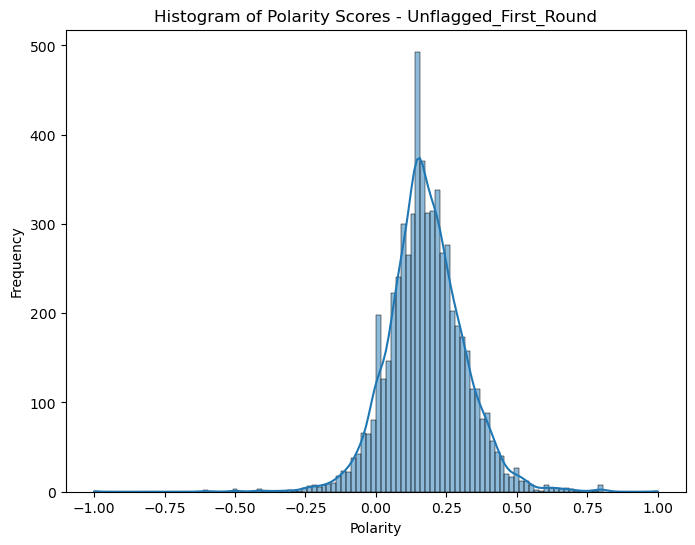

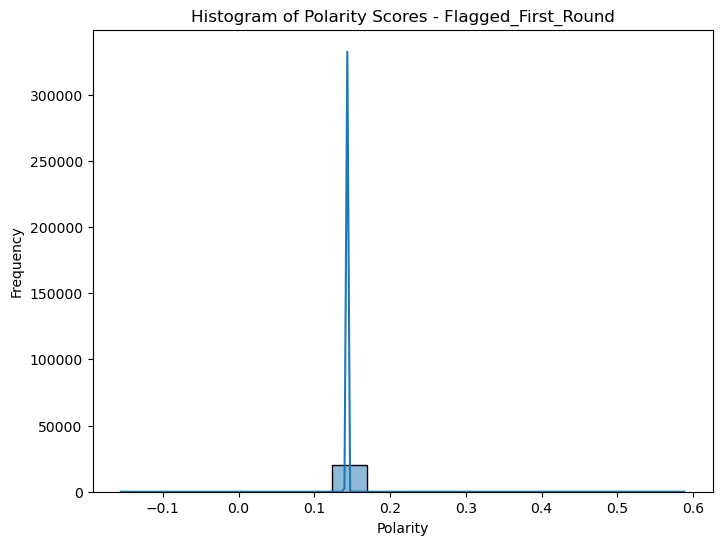

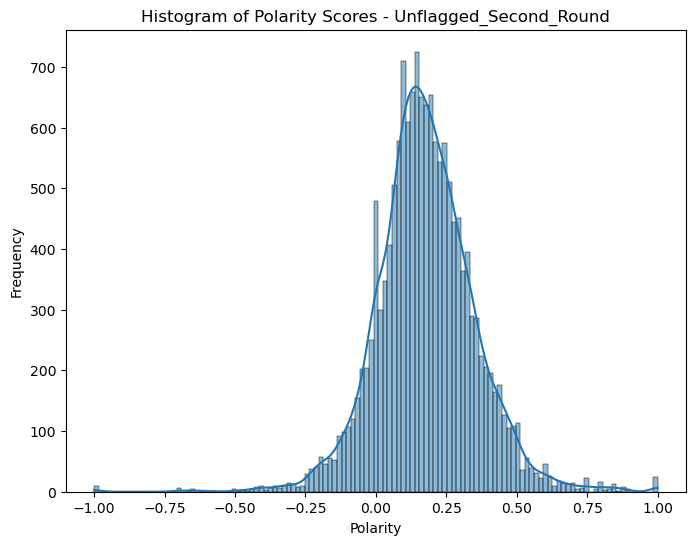

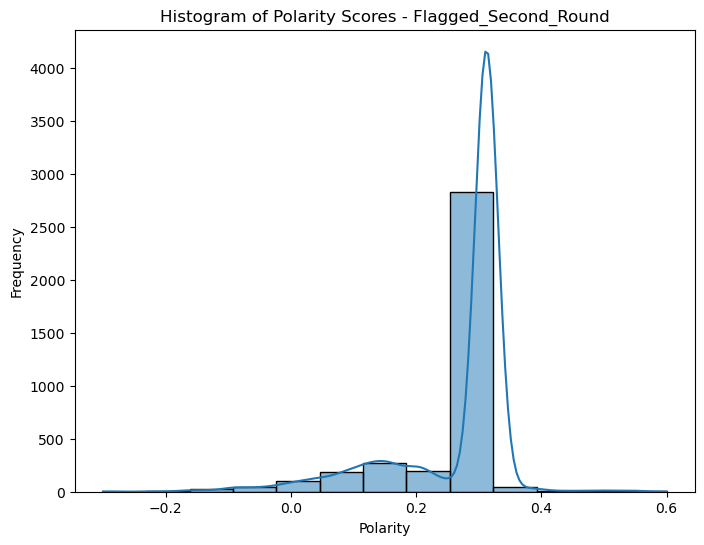

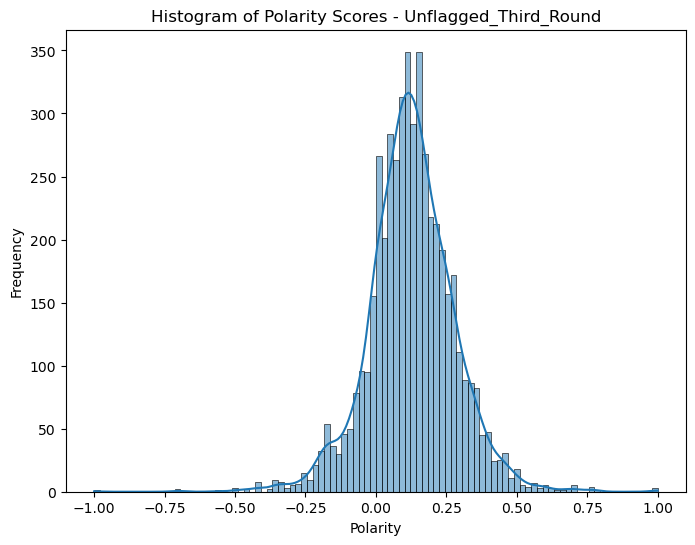

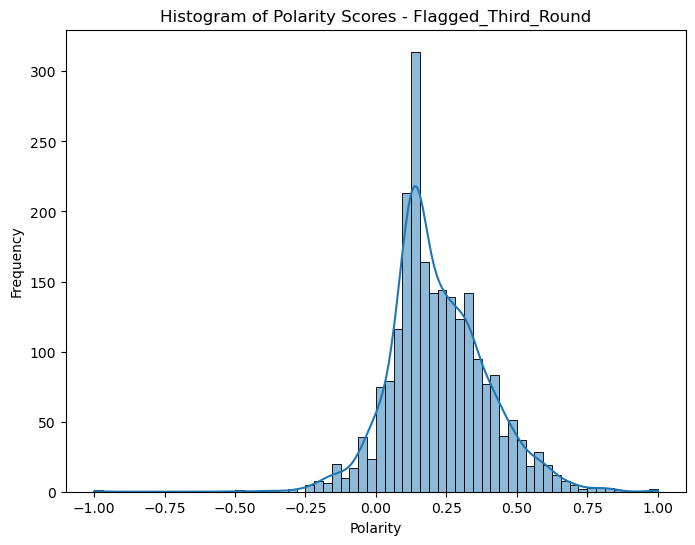

In [15]:
# Create a list of dataset names and corresponding DataFrames
dataset_names = ['Unflagged_First_Round', 'Flagged_First_Round', 'Unflagged_Second_Round',
                 'Flagged_Second_Round', 'Unflagged_Third_Round', 'Flagged_Third_Round']

datasets = [Unflagged_First_Round, Flagged_First_Round, Unflagged_Second_Round,
            Flagged_Second_Round, Unflagged_Third_Round, Flagged_Third_Round]

# Plot histograms for each dataset
for name, df in zip(dataset_names, datasets):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='Polarity', kde=True)
    plt.title(f'Histogram of Polarity Scores - {name}')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.show()